# Estimation of $\pi$ using Monte Carlo Integration

In [5]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
import distrax
import ipywidgets as widget

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

key = jax.random.PRNGKey(0)

In [6]:
pml.latexify(width_scale_factor=2)

the estimated pi = 3.168000
the standard pi = 3.141593
stderr = 0.091839


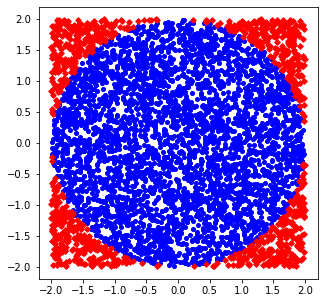

In [7]:
def estimate_pi(N=5000, r=2, savefig=False):
    global key
    uniform = distrax.Uniform(low=-r, high=r)
    xs = uniform.sample(seed=key, sample_shape=N)
    key, subkey = jax.random.split(key)
    ys = uniform.sample(seed=key, sample_shape=N)
    rs = xs**2 + ys**2

    inside = rs <= r**2
    samples = 4 * (r**2) * inside
    ihat = np.mean(samples)
    pi_estimate = ihat / (r**2)
    se = np.sqrt(np.var(samples) / N)

    print(("the estimated pi = %f" % pi_estimate))
    print(("the standard pi = %f" % np.pi))
    print(("stderr = %f" % se))

    # plot the samples
    if pml.is_latexify_enabled():
        plt.figure()
    else:
        plt.figure(figsize=(5, 5))
    plt.plot(xs[inside], ys[inside], "bo", markersize=4)
    plt.plot(xs[~inside], ys[~inside], "rD", markersize=4)
    if savefig:
        pml.savefig("mcEstimatePi_latexified")
    plt.show()


estimate_pi(savefig=True)

In [4]:
widget.interact(estimate_pi, N=(200, 20000, 10), r=(0.5, 5, 0.1))

interactive(children=(IntSlider(value=5000, description='N', max=20000, min=200, step=10), FloatSlider(value=2…

<function __main__.estimate_pi(N=5000, r=2, savefig=False)>